<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Aprendizaje no supervisado : Clustering usando K-Means**

Este taller guiado tiene como objetivo mostrar la implementación del algoritmo K Means de  Machine Learning usando scikitlearn. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* Usar el algoritmo k-means para agrupar un dataset
* Evaluar el desempeño de la agrupación


## **1. Importar librería sklearn**

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Scikit-learn 1.0.2


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 1.0

## **2. Cargar datos**

Vamos a trabajar con un dataset sintético creado con la función ``make_blobs``. Adicionalmente trabajaremos con el dataset ya conocido IRIS.

In [ ]:
from sklearn.datasets import make_blobs

X_blobs, y_blobs = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state= 321,cluster_std= 1.1)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris(return_X_y=False)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## **3. Exploración**

Hagamos una gráfica del dataset sintético blobs.

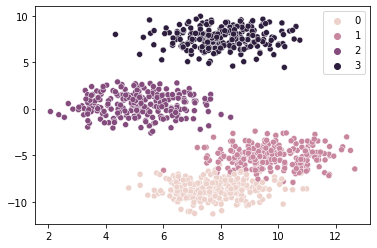

In [ ]:
sb.scatterplot(x = X_blobs[:, 0], y = X_blobs[:, 1], hue = y_blobs);

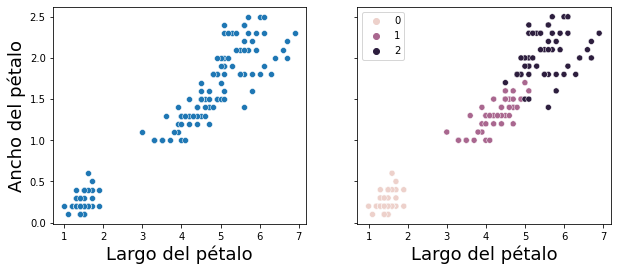

In [ ]:
# Declaramos una matriz X_iris con las medidas de las flores y otra con 
X_iris = iris.data
y_iris = iris.target

fig, axes = plt.subplots(1,2, figsize = (10,4),sharex=True, sharey=True)

# Datos sin mapeo
sb.scatterplot(x = X_iris[:,2], y = X_iris[:,3], ax = axes[0])

sb.scatterplot(x = X_iris[:,2], y = X_iris[:,3], hue = y_iris, ax = axes[1])
axes[0].set_xlabel('Largo del pétalo', fontsize=18)
axes[0].set_ylabel('Ancho del pétalo', fontsize=18)
axes[1].set_xlabel('Largo del pétalo', fontsize=18)
plt.show();

¿Cuántos clústers ve en la gráfica de la izquieda? ¿Es obvio para usted que son 3?

## **4. Agrupamiento**

### **4.1 Blobs**


Primero hagamos la agrupación con los datos sintéticos blobs.

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 6 , # Número de clusters
            random_state=1, # Semilla para la generación de variables aleatorias, por ejemplo posici+on inicial de centroides
            max_iter= 10 # Numero de iteraciones máximo
            )

km.fit(X_blobs)


KMeans(max_iter=10, n_clusters=6, random_state=1)

In [ ]:
km.inertia_

1922.1050897641423

In [ ]:
centers = km.cluster_centers_
print(centers)

[[ 9.89262067 -4.79312521]
 [ 8.03512724  7.61443286]
 [ 4.99460326 -0.52197463]
 [ 8.85411502 -7.55268294]
 [ 5.38237122  1.39709591]
 [ 7.24233459 -8.91888501]]


In [ ]:
labels = km.labels_
print(labels)

[3 1 3 1 4 1 5 2 0 5 3 4 1 3 5 3 0 4 1 4 0 2 0 1 1 4 3 5 3 5 3 2 4 3 1 2 1
 0 4 2 2 0 3 5 2 5 2 5 0 0 0 4 0 5 1 0 3 3 0 4 4 3 0 3 4 5 3 3 1 3 1 2 5 0
 3 0 0 1 0 0 2 1 5 2 3 2 0 2 5 3 2 4 1 3 1 1 2 1 3 1 4 0 3 1 1 1 1 1 2 3 5
 4 3 1 0 0 0 1 4 0 0 0 3 1 0 1 0 0 3 2 1 1 2 5 4 0 5 2 5 1 1 4 5 5 5 0 5 3
 1 1 1 0 0 0 5 0 5 0 0 0 1 1 1 5 5 5 5 0 3 3 4 0 5 0 2 3 2 1 5 5 3 1 1 2 5
 5 0 1 1 1 5 0 2 0 2 4 0 1 4 5 1 5 4 0 4 4 5 2 2 5 4 3 0 2 0 4 5 5 5 1 4 1
 4 1 5 5 4 4 0 5 4 3 4 0 1 2 3 4 1 5 2 4 1 4 1 5 0 5 5 2 1 0 0 0 5 5 4 4 0
 5 4 1 5 1 2 5 4 3 4 0 5 1 1 0 0 1 5 1 1 1 4 1 1 5 2 1 0 5 5 2 0 4 1 0 4 1
 0 5 2 5 1 1 0 1 1 4 5 1 2 3 1 1 0 0 0 5 5 2 0 0 5 1 1 1 4 5 2 1 4 3 2 1 1
 5 1 0 3 1 1 0 5 0 5 2 1 2 1 3 1 3 1 2 2 5 0 0 1 4 0 1 3 3 1 4 0 4 5 3 2 2
 1 3 1 1 1 4 0 0 1 5 1 1 3 5 1 0 5 4 1 0 2 4 0 1 1 4 1 5 4 2 2 2 0 3 1 0 1
 4 4 1 1 0 5 4 0 1 0 4 3 3 0 5 2 0 3 4 4 1 4 0 3 4 3 5 3 2 5 0 2 3 3 1 3 2
 5 5 2 1 1 3 5 3 1 1 0 0 2 1 0 5 2 1 3 2 2 0 0 5 4 5 3 2 0 0 0 3 2 1 4 3 4
 0 2 1 0 0 5 0 0 5 4 5 1 

In [ ]:
km.n_iter_

10

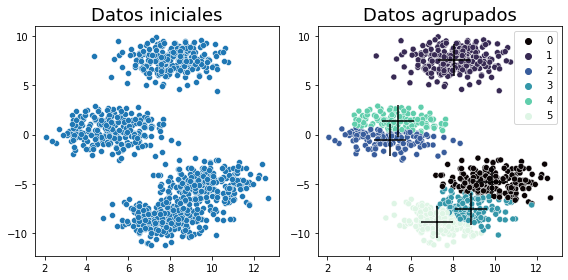

In [ ]:
#@title Para ver el código de click en Mostrar código
# Crear 2 subplots
fig,axes=plt.subplots(1,2,figsize=(8,4))

# Pasa la información que va en cada gráfica

sb.scatterplot(x = X_blobs[:, 0], y = X_blobs[:, 1], ax = axes[0])
sb.scatterplot(x = X_blobs[:, 0], y = X_blobs[:, 1], hue = labels, ax = axes[1], palette = 'mako')

# Centroides
axes[1].scatter(x = centers[:,0], y = centers[:,1], marker = '+', s = 1000, c = 'black')

# Titulo, y titulos de eje
axes[0].set_title('Datos iniciales',fontsize=18)
axes[1].set_title('Datos agrupados',fontsize=18)

plt.tight_layout()
plt.show();

Modifique el valor de k y observe las diferencias en la visualización.

### **4.2 Iris**

In [ ]:
from sklearn.cluster import KMeans

# Se crea un objeto que va guardar la información del agrupamiento

km = KMeans(n_clusters=4 , # Número de clusters
            random_state=21, # Semilla para la generación de variables aleatorias, por ejemplo posici+on inicial de centroides
            max_iter= 10000 # Numero de iteraciones máximo
            )

 # Note que hacemos el ajuste solamente con las variables predictoras, sin la etiqueta objetivo

km.fit(X_iris)

KMeans(max_iter=10000, n_clusters=4, random_state=21)

Identificamos los centroides de la agrupación

In [ ]:
centers = km.cluster_centers_
print(centers)

[[6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.2525     2.855      4.815      1.625     ]]


Identificamos las nuevas etiquetas dadas por la agrupación

In [ ]:
new_labels = km.labels_
print(new_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]


In [ ]:
km.n_iter_

4

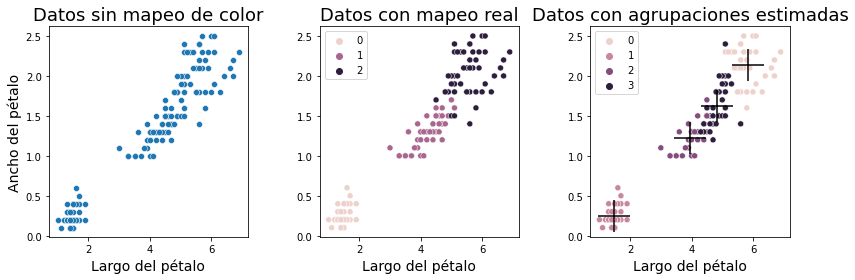

In [ ]:
#@title Para ver el código de click en mostrar código
# Crear 3 subplots
fig,axes=plt.subplots(1,3,figsize=(12,4))

# Pasa la información que va en cada gráfica

sb.scatterplot(x = X_iris[:,2], y = X_iris[:,3], ax = axes[0])
sb.scatterplot(x = X_iris[:,2], y = X_iris[:,3], hue = y_iris, ax = axes[1])
sb.scatterplot(x = X_iris[:,2], y = X_iris[:,3], hue = new_labels,ax = axes[2])

# Centroides
axes[2].scatter(x = centers[:,2], y = centers[:,3], marker = '+', s = 1000, c = 'black')

# Titulo, y titulos de eje
axes[0].set_title('Datos sin mapeo de color',fontsize=18)
axes[1].set_title('Datos con mapeo real',fontsize=18)
axes[2].set_title('Datos con agrupaciones estimadas',fontsize=18)

axes[0].set_xlabel('Largo del pétalo', fontsize=14)
axes[0].set_ylabel('Ancho del pétalo', fontsize=14)
axes[1].set_xlabel('Largo del pétalo', fontsize=14)
axes[2].set_xlabel('Largo del pétalo', fontsize=14)

plt.tight_layout()
plt.show();


Modifique el número de clusters entre 1 a 6. ¿Cuál considera que logra la mejor agrupación? 

## **5. Evaluación del desempeño del agrupamiento**

### **5.1 Coeficiente silueta**

El coeficiente silueta es un indicador de similud, toma valores entre -1 y 1. Donde 1 es el indicador óptimo de separación. Este coeficiente mide la cohesión entre datos del mismo grupo y la separación entre datos de diferentes grupos.


El coeficiente de silueta combina la distancia media *intra-cluster* ($a$) y la distancia media al grupo más cercano ($b$) para cada muestra ($s_i$):
$$ s_i = \frac{b - a}{\max(a,b)}$$

Valores cercanos a 1 indican que la distancia inter-cluster es mucho más grande que la distancia intra-cluster.

### **5.2 Inercia**

La inercia o distancia intra-clúster mide la cohesión en cada clúster, el algoritmo de k-means busca disminuir esta medida en función de las iteraciones.

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

Donde $\mu_j$ es la media de cada clúster, también llamado centroide.

Ahora usemos las métricas para encontrar cuál es la agrupación óptima.

In [ ]:
from sklearn.metrics import silhouette_score

coef_silueta = []
inertia = []

K = range(2,10)
for numero_clusters in K:
  km = KMeans(n_clusters = numero_clusters, random_state= 5, max_iter = 1000)
  km.fit(X_blobs)
  y = km.predict(X_blobs)
  coef_silueta.append(silhouette_score(X_blobs,y))
  inertia.append(km.inertia_)


Text(0, 0.5, 'Inercia')

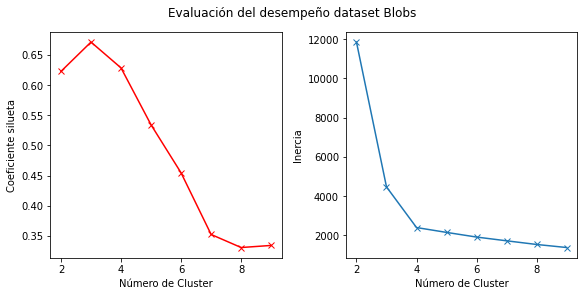

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (8,4),constrained_layout=True)

fig.suptitle('Evaluación del desempeño dataset Blobs')

axes[0].plot(K , coef_silueta, marker='x', c = 'r')
axes[0].set_xlabel('Número de Cluster')
axes[0].set_ylabel('Coeficiente silueta')

axes[1].plot(K , inertia, marker='x')
axes[1].set_xlabel('Número de Cluster')
axes[1].set_ylabel('Inercia')


Para la escogencia óptima del número de clusters se busca:
* Maximizar el coeficiente silueta 
* Disminuir la inercia

A menudo se usa el método del codo en la gráfica de inercia, es decir el punto máximo de inflexión. En el caso del dataset blobs está entre 3 y 4. En 3 y 4 también se obtienen coeficientes silueta relativamente altos indicado una separación eficiente entre clusters y cohesión interna entre cada grupo de datos.

In [ ]:
from sklearn.metrics import silhouette_score

coef_silueta = []
inertia = []
K = range(2,10)
for numero_clusters in K:
  km = KMeans(n_clusters = numero_clusters, random_state= 5, max_iter = 1000)
  km.fit(X_iris)
  y = km.predict(X_iris)
  coef_silueta.append(silhouette_score(X_iris,y))
  inertia.append(km.inertia_)

Text(0, 0.5, 'Inercia')

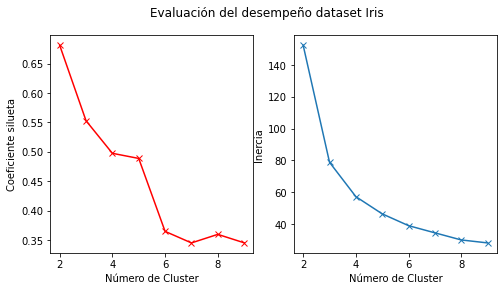

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (8,4))

fig.suptitle('Evaluación del desempeño dataset Iris')

axes[0].plot(K , coef_silueta, marker='x', c = 'r')
axes[0].set_xlabel('Número de Cluster')
axes[0].set_ylabel('Coeficiente silueta')

axes[1].plot(K , inertia, marker='x')
axes[1].set_xlabel('Número de Cluster')
axes[1].set_ylabel('Inercia')


In [ ]:
km_final = KMeans(n_clusters=4,random_state = 5)
km_final.fit(X_iris)

KMeans(n_clusters=4, random_state=5)

In [ ]:
km_final.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int32)

In [ ]:
iris_final = pd.DataFrame(X_iris)

In [ ]:
iris_final['etiqueta'] = km_final.labels_

In [ ]:
iris_final.to_csv('Documento.csv')

## **Recursos adicionales**



- Clustering - Scikit-learn

https://scikit-learn.org/stable/modules/clustering.html

- Data Mining Cluster Analysis: Basic Concepts and Algorithms - Introduction to Data Mining by Tan, Steinbach, Karpatne, Kumar

https://www-users.cs.umn.edu/~kumar001/dmbook/slides/chap7_basic_cluster_analysis.pdf

- Cluster Analysis in Data Mining

https://es.coursera.org/learn/cluster-analysis



## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*